In [2]:
import sys
sys.path.insert(0, "C:\\Users\\manis\\Desktop\\UChicago Docs\\Winter Quarter\\Project Lab 36001\\Factor-Research\\src")

from util import backtest_utilities, performance_utilities
import pandas as pd
import numpy as np

In [3]:
df=pd.read_excel(r"C:\Users\manis\Desktop\UChicago Docs\Winter Quarter\Project Lab 36001\Factor-Research\test\Resources\ExcelFiles\backtest returns sample.xlsx").set_index("Date")
df=df.dropna()
df

,SPY,JPM,MSFT,AAPL,AGG,TLT
Date,,,,,,
2003-09-29,0.009805,0.013454,0.022703,0.029483,-0.002733,-0.008002
2003-09-30,-0.009710,-0.009235,-0.035727,-0.027230,0.005187,0.016594
2003-10-01,0.021311,0.030586,0.025899,0.003379,-0.000487,-0.003776
2003-10-02,0.003625,-0.000565,-0.000701,-0.010582,-0.001559,-0.004570
2003-10-03,0.009175,0.004283,0.020351,0.054448,-0.007220,-0.021006
...,...,...,...,...,...,...
2025-01-06,0.005761,-0.004850,0.010630,0.006739,-0.001033,-0.004468
2025-01-07,-0.011304,0.009632,-0.012808,-0.011388,-0.003516,-0.011277
2025-01-08,0.001461,-0.000164,0.005185,0.002023,0.001141,0.001280


In [4]:
rebalance_indexes=backtest_utilities.GetReblanceIndexes(df.to_numpy(), df.index, "M")
rebalance_indexes

array([ 254,  275,  296,  318,  338,  357,  379,  400,  421,  443,  463,
        486,  507,  528,  549,  570,  590,  609,  632,  651,  673,  695,
        715,  738,  758,  780,  801,  821,  841,  860,  882,  902,  924,
        945,  966,  989, 1008, 1031, 1052, 1072, 1093, 1113, 1133, 1155,
       1176, 1197, 1219, 1240, 1261, 1284, 1303, 1325, 1345, 1364, 1386,
       1407, 1427, 1449, 1471, 1492, 1513, 1535, 1555, 1577, 1596, 1615,
       1638, 1659, 1679, 1701, 1722, 1744, 1765, 1786, 1807, 1829, 1849,
       1868, 1891, 1911, 1932, 1954, 1974, 1997, 2018, 2039, 2060, 2081,
       2101, 2121, 2143, 2163, 2185, 2206, 2227, 2250, 2269, 2290, 2311,
       2331, 2352, 2371, 2391, 2413, 2435, 2455, 2477, 2499, 2519, 2542,
       2562, 2583, 2604, 2623, 2644, 2665, 2686, 2707, 2729, 2750, 2771,
       2794, 2813, 2835, 2855, 2874, 2896, 2917, 2937, 2959, 2981, 3002,
       3023, 3045, 3065, 3087, 3106, 3126, 3148, 3169, 3190, 3212, 3232,
       3255, 3276, 3297, 3318, 3339, 3359, 3378, 34

In [5]:
allocations=np.zeros((rebalance_indexes.shape[0], df.shape[1]+1)) # you add the plus 1 so cash will be in allocations
allocations[:,:-1]=1/df.shape[1]


In [6]:
bt=backtest_utilities.GetBacktestReturns(df.to_numpy(), allocations, rebalance_indexes, np.zeros(df.shape[0]))

<Axes: xlabel='Date'>

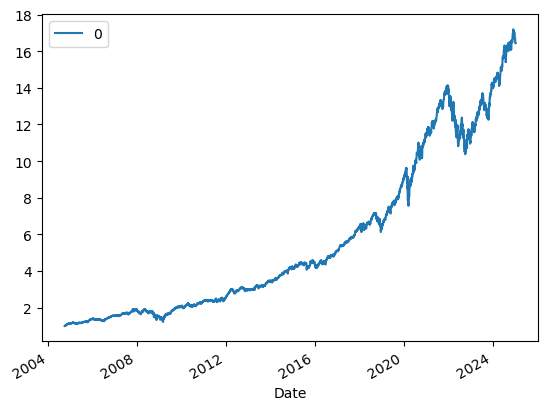

In [7]:
bt_df=pd.DataFrame(bt, index=df.index)
(1+bt_df).cumprod().plot()

In [8]:
performance_utilities.get_data_frame_mpt_statistics(bt_df)

,0
ST Date,2004-10-04 00:00:00
ED Date,2025-01-13 00:00:00
Return,15.435222
CAGR,0.148255
Risk,0.146718
Sharpe,1.010478
MaxDD,0.369201
MAR,0.401556
2003,NaN
2004,0.126488
